In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt # just for histograms!
import numpy as np
import math

# from IPython.display import display, HTML
import plotnine as pn

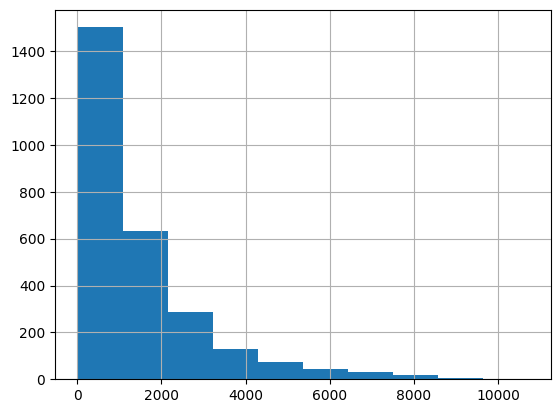

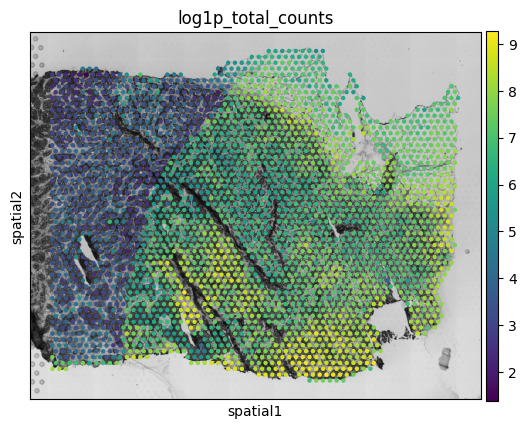

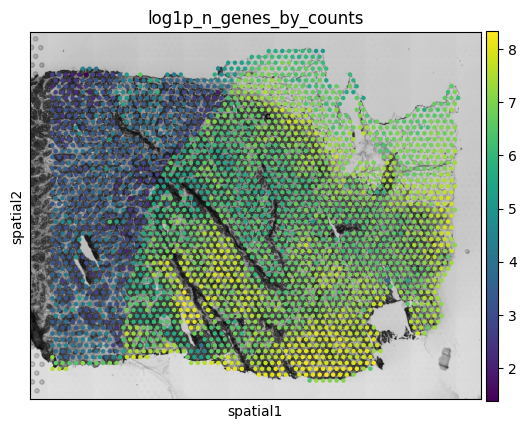

In [2]:
s8t2 = ad.read_h5ad("./intermediate_data/33D_S8T2.h5ad")
# s8t2 = adatas['33D']
sc.pp.calculate_qc_metrics(s8t2, inplace=True)
s8t2.obs['total_counts'].hist()
s8t2.obs['log1p_total_counts'].hist()
sc.pl.spatial(s8t2, bw = True, color = 'log1p_total_counts')
# Gene counts
sc.pl.spatial(s8t2, color = 'log1p_n_genes_by_counts', bw = True)

 Seems like between 3 and 4 might be a clear cutoff for the side region. The region is not 0, onor is it particularly high.
 We can check with `np.log1p(50)` that 50 is a pretty good cutoff. We could also do `np.log1p(100)` to see it's about 4.6

Cutoff 50


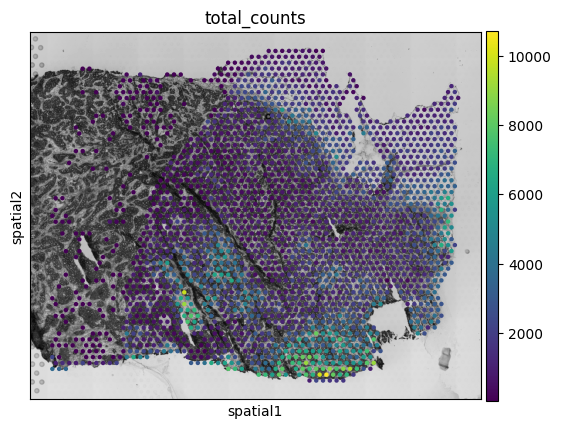

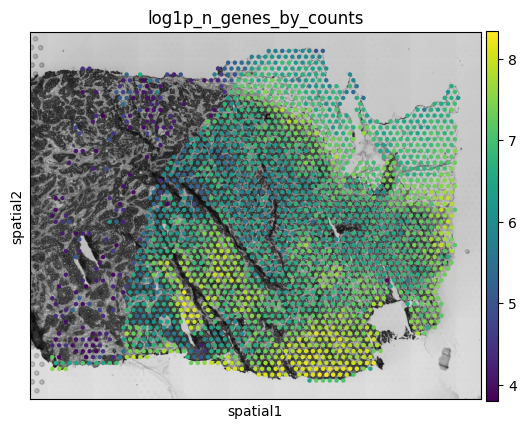

Cutoff 100


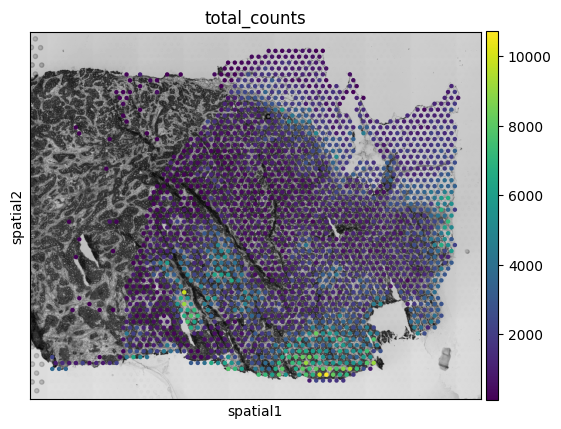

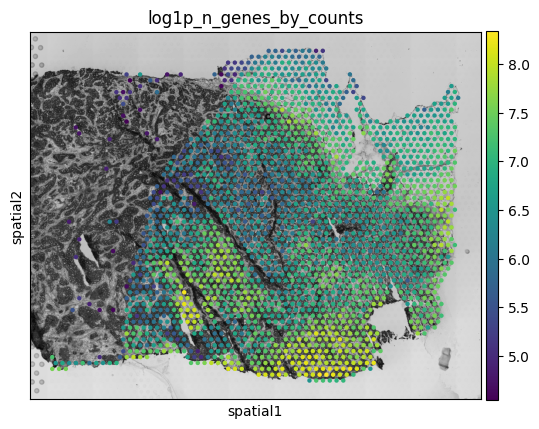

In [3]:
print('Cutoff 50')
sc.pl.spatial(s8t2[s8t2.obs['total_counts'] > 50, :], color = 'total_counts', bw = True)
sc.pl.spatial(s8t2[s8t2.obs['total_counts'] > 50, :], color = 'log1p_n_genes_by_counts', bw = True)
print('Cutoff 100')
sc.pl.spatial(s8t2[s8t2.obs['total_counts'] > 100, :], color = 'total_counts', bw = True)
sc.pl.spatial(s8t2[s8t2.obs['total_counts'] > 100, :], color = 'log1p_n_genes_by_counts', bw = True)

 Let's choose our cutoff to be 100 total counts.

In [4]:
CUTOFF = 100
s8t2_filtered = s8t2[s8t2.obs['total_counts'] > CUTOFF, :].copy()
s8t2_filtered.write("./intermediate_data/33D_S8T2_filtered.h5ad")